# Convolutions and Dimensions

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline

### Convlutions 
Consider the following convolution filters:
```python
k1 = [ [0 0 0], [0 1 0], [0 0 0] ]
k2 = [ [0 0 0], [0 0 1], [0 0 0] ]
k3 = [ [-1-1 -1], [-1 8 -1], [-1 -1 -1] ]
k4 = [ [1 1 1], [1 1 1], [1 1 1] ] / 9
```

Can you guess what each of them computes?

k1: Nothing

k2: shift array by 1 pixel left

k3: Edge detection

k4: averaging (smoothing)

#### Apply to arrays
Apply the convolutions above to the following array, using numpy:


In [5]:
x = np.array([[-1, -3, -4,  0, -1],
       [ 2, -2, -4,  0, -2],
       [-3, -2,  2,  2,  3],
       [ 0, -3, -4, -4, -2],
       [-4, -2,  2,  0,  1]])

k1 = np.array([[0,0,0], [0,1,0], [0,0,0]]);
k2 = np.array([[0,0,0], [0,0,1], [0,0,0]]);
k3 = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]]);
k4 = np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]]) / 9

In [ ]:
import numpy as np

def convolve2d(x, flt):
    kernel_sz = flt.shape[0]
    kernel_half_sz = np.int32(np.floor(kernel_sz/2))
    rows = x.shape[0]
    cols = x.shape[1]
    tmp = np.zeros((rows + kernel_half_sz*2, cols + kernel_half_sz*2), dtype=np.float32)
    tmp[kernel_half_sz:-kernel_half_sz, kernel_half_sz:-kernel_half_sz] = x
    res = np.zeros_like(x, dtype=np.float32)
    for j in range(rows):
        for i in range(cols):
            res[j, i] = np.sum(flt * tmp[j:j+kernel_sz, i:i+kernel_sz])
    return res

print('k1: ', convolve2d(x, k1))
print('\nk2:', convolve2d(x, k2))    
print('\nk3:', convolve2d(x, k3))
print('\nk4:', convolve2d(x, k4))

k1:  [[-1. -3. -4.  0. -1.]
 [ 2. -2. -4.  0. -2.]
 [-3. -2.  2.  2.  3.]
 [ 0. -3. -4. -4. -2.]
 [-4. -2.  2.  0.  1.]]

k2: [[-3. -4.  0. -1.  0.]
 [-2. -4.  0. -2.  0.]
 [-2.  2.  2.  3.  0.]
 [-3. -4. -4. -2.  0.]
 [-2.  2.  0.  1.  0.]]

k3: [[ -5. -15. -23.  11.  -6.]
 [ 27.  -3. -25.   4. -20.]
 [-19.  -4.  33.  27.  30.]
 [ 14. -13. -27. -36. -18.]
 [-27.  -7.  29.   7.  14.]]

k4: [[-4.4444445e-01 -1.3333334e+00 -1.4444444e+00 -1.2222222e+00
  -3.3333334e-01]
 [-1.0000000e+00 -1.6666666e+00 -1.2222222e+00 -4.4444445e-01
   2.2222222e-01]
 [-8.8888890e-01 -1.5555556e+00 -1.6666666e+00 -1.0000000e+00
  -3.3333334e-01]
 [-1.5555556e+00 -1.5555556e+00 -1.0000000e+00  0.0000000e+00
   5.5511151e-17]
 [-1.0000000e+00 -1.2222222e+00 -1.2222222e+00 -7.7777779e-01
  -5.5555558e-01]]


#### Apply to images
Apply the convolution filters above on the image. You should convert the image to grayscale, and apply the filters on the grayscale image. 
Show the results:

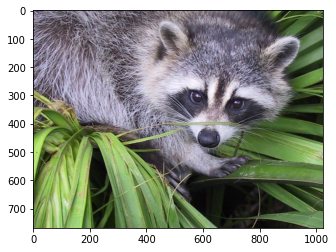

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.misc
face = scipy.misc.face()
plt.imshow(face); plt.show()


In [ ]:
import skimage.color
face_yiq = skimage.color.rgb2yiq(face)
gray = face_yiq[:,:,0]
gray_k1 = convolve2d(gray, k1); 
gray_k2 = convolve2d(gray, k2);
gray_k3 = convolve2d(gray, k3);
gray_k4 = convolve2d(gray, k4);

In [ ]:
def convert_to_rgb(yiq,new_gray):
  yiq[:,:,0] = new_gray ; 
  return skimage.color.yiq2rgb(yiq)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


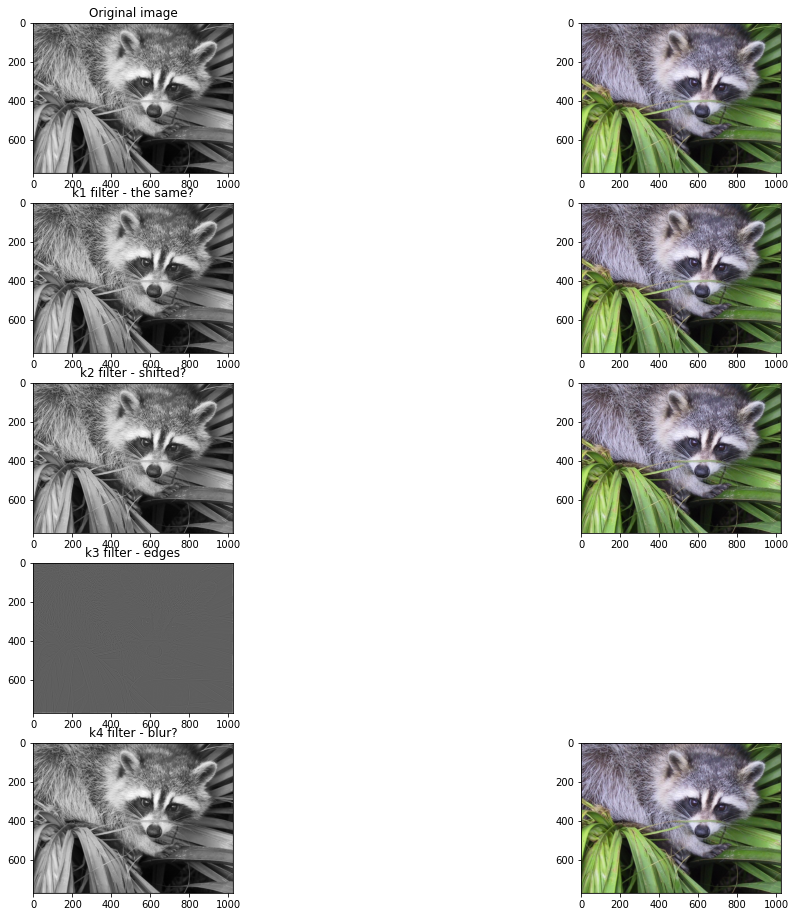

In [ ]:
# "Stream and bridge" USC SIPI test image #5.2.10, 512x512, 8-bit grayscale
plt.figure(figsize=(18, 16))
ax0 = plt.subplot(5,2,1); plt.imshow(gray,cmap='gray'); ax0.set_title('Original image')
plt.subplot(5,2,2); plt.imshow(convert_to_rgb(face_yiq,gray)); 
ax1 = plt.subplot(5,2,3); plt.imshow(gray_k1,cmap='gray'); ax1.set_title('k1 filter - the same?'),
plt.subplot(5,2,4); plt.imshow(convert_to_rgb(face_yiq,gray_k1)); 
ax2 = plt.subplot(5,2,5); plt.imshow(gray_k2,cmap='gray'); ax2.set_title('k2 filter - shifted?'),
plt.subplot(5,2,6); plt.imshow(convert_to_rgb(face_yiq,gray_k2)); 
ax3 = plt.subplot(5,2,7); plt.imshow(gray_k3,cmap='gray'); ax3.set_title('k3 filter - edges'),
ax4 = plt.subplot(5,2,9); plt.imshow(gray_k4,cmap='gray'); ax4.set_title('k4 filter - blur?'),
plt.subplot(5,2,10); plt.imshow(convert_to_rgb(face_yiq,gray_k4)); 



## Dimensions

What would be the output dimensions in these cases (input size is NxN)?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1
1. Zero padding, stride of 2

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account the padding option and the stride. 

'Zero padding' means that we padded by floor(kernel_sz/2) in every dimension

>Answer:

Kernel size is $d\times d$

The input array size is $(N\times N)$, and the stride $s$ is either $s = 1$ or $s = 2$

In the zero paddind case the output size is:

$(N_{out}\times N_{out})_{zero\_pad}:\ N_{out}= N \mathrm{div}\ s + N\ \mathrm{mod}\ s$

In the no-padding case the input size in every dimension is effectively lower than with the zero-padding by $d-1$ so:

$(N_{out}\times N_{out})_{no\_pad}:\ N_{out}=(N-d+1)\ \mathrm{div}\ s + (N-d+1)\ \mathrm{mod}\ s$

--------
For example, for kernel = $3\times 3$:

No padding, stride of 1 -> $(N-1) \times (N-1)$

No padding, stride of 2 -> $(N-2)/2\times (N-2)/2$

Zero padding, stride of 1 -> $N\times N$

Zero padding, stride of 2 -> $N/2\times N/2$


### Network dimensions
Write below the dimensions, the number of parameters and the number of calculations made in each layer of this network for the MNIST data:

- Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).

Please write in this this format: (C,W,H) -> (#channels, width, height)



The MNIST dataset has $28$⨯$28$ grayscale image size, so the layer parameters, assuming padding, are
- Input layer: dimensions $1$⨯$28$⨯$28$
- Convolutional Layer #1 ($32$ $1$⨯$5$⨯$5$ kernels): 
  
  dimensions: $32$⨯$28$⨯$28$  

  parameters: $5\times 5 \times 32+32=832$

  calculations: $32 \times 5\times 5 \times 1 \times 2 \times 28 \times 28 =1.2M$

- Pooling Layer #1 ($2$⨯$2$, stride $2$): 

  dimensions: $32$⨯$14$⨯$14$

  parameters: 0

  calculations: $14\times 14 \times 32 = 6K $

- Convolutional Layer #2 ($64\ 32$⨯$5$⨯$5$ kernels): 
  
  dimensions: $64$⨯$14$⨯$14$ 

  parameters: $5\times 5\times 32\times 64+64 = 51264$ 
  
  calculations: $64 \times 5\times 5 \times 32 \times 2 \times 28 \times 28 =80M$

- Pooling Layer #2 ($2$⨯$2$, stride $2$): 

  dimensions: $64$⨯$7$⨯$7$

  parameters: 0

  calculations: $64 \times 7 \times 7 = 3K$ 

- Dense Layer #1: 
  
  dimensions: $1024$ neurons
  
  $7\times 7\times 64\times 1024+1024 = 3212288$ parameters (flattening and then fc)

  calculations: $7\times 7 \times 64 \times 1024 \times 2 =6.4M$
- Dense Layer #2: 

  dimensions: $10$ neurons 
  
  parameters: $1024\times 10+10 = 10250$ 

  calculations: $1024\times 10 \times 2 = 20K$